In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix 

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [7]:
path =  "./models/data/df_origine.joblib"
# Enregistrez le modèle
joblib.dump(df_origine, path)

path =  "./models/data/df.joblib"
# Enregistrez le modèle
joblib.dump(df, path)

['./models/data/df_origine.joblib']

In [6]:
my_data = pd.read_csv("./data_csv/proba_final/data.csv", encoding='ISO-8859-1')

In [7]:
my_data

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,INSTA_NEW_DPD_MEAN,INSTA_NEW_PAYMENT_DIFF_MAX,INSTA_NEW_PAYMENT_DIFF_MEAN,INSTA_AMT_INSTALMENT_MEAN,INSTA_NUM_INSTALMENT_NUMBER_MAX,INSTA_DAYS_ENTRY_PAYMENT_MAX,INSTA_DAYS_ENTRY_PAYMENT_MEAN,Class_0,Class_1,y_pred
0,100001,135000.0,568800.0,20560.5,2,4,1,1,1,53.0,...,1.571429,0.00,0.000000,5885.132143,4.0,-1628.0,-2195.000000,0.713494,0.286506,Accordé
1,100005,99000.0,222768.0,17370.0,2,4,4,1,1,49.0,...,0.111111,0.00,0.000000,6240.205000,9.0,-470.0,-609.555556,0.547997,0.452003,Accordé
2,100013,202500.0,663264.0,69777.0,2,4,1,1,1,55.0,...,0.541935,23147.82,1157.662742,10897.898516,113.0,-14.0,-1358.109677,0.940406,0.059594,Accordé
3,100028,315000.0,1575000.0,49018.5,2,4,4,1,1,38.0,...,0.265487,8505.00,622.550708,4979.282257,74.0,-29.0,-858.548673,0.878470,0.121530,Accordé
4,100042,270000.0,959688.0,34600.5,2,3,4,1,1,51.0,...,0.192308,32670.90,263.374615,22120.177995,120.0,-17.0,-1546.208791,0.787681,0.212319,Accordé
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40071,456202,135000.0,252022.5,23112.0,2,4,4,0,1,32.0,...,0.040000,0.00,-2219.760000,17446.546800,12.0,-6.0,-297.600000,0.906163,0.093837,Accordé
40072,456221,121500.0,412560.0,17473.5,2,4,4,4,1,55.0,...,0.000000,0.00,0.000000,91036.455000,3.0,-599.0,-630.333333,0.983810,0.016190,Accordé
40073,456223,202500.0,315000.0,33205.5,2,1,4,1,1,44.0,...,0.000000,0.00,0.000000,23158.991250,6.0,-33.0,-586.375000,0.722710,0.277290,Accordé
40074,456224,225000.0,450000.0,25128.0,1,1,1,1,1,38.0,...,0.034483,0.00,0.000000,17269.234138,19.0,-13.0,-924.965517,0.693999,0.306001,Accordé


In [5]:
df_test = pd.read_csv('./data_csv/traitement_test/test.csv')

In [3]:
scaler = joblib.load('./models/scaler.model')

In [4]:
explainer = joblib.load('./models/explainer.model')

In [7]:
lgbm_model = joblib.load('./models/LGBMClassifier.model')



In [13]:
df_test.shape

(40076, 142)

In [14]:
df_test.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,INSTA_NUM_INSTALMENT_VERSION_NUNIQUE,INSTA_NEW_DBD_MAX,INSTA_NEW_DPD_MAX,INSTA_NEW_DPD_MEAN,INSTA_NEW_PAYMENT_DIFF_MAX,INSTA_NEW_PAYMENT_DIFF_MEAN,INSTA_AMT_INSTALMENT_MEAN,INSTA_NUM_INSTALMENT_NUMBER_MAX,INSTA_DAYS_ENTRY_PAYMENT_MAX,INSTA_DAYS_ENTRY_PAYMENT_MEAN
0,100001,135000.0,568800.0,20560.5,2,4,1,1,1,53.0,...,2.0,36.0,11.0,1.571429,0.00,0.000000,5885.132143,4.0,-1628.0,-2195.000000
1,100005,99000.0,222768.0,17370.0,2,4,4,1,1,49.0,...,2.0,37.0,1.0,0.111111,0.00,0.000000,6240.205000,9.0,-470.0,-609.555556
2,100013,202500.0,663264.0,69777.0,2,4,1,1,1,55.0,...,3.0,38.0,21.0,0.541935,23147.82,1157.662742,10897.898516,113.0,-14.0,-1358.109677
3,100028,315000.0,1575000.0,49018.5,2,4,4,1,1,38.0,...,3.0,19.0,7.0,0.265487,8505.00,622.550708,4979.282257,74.0,-29.0,-858.548673
4,100042,270000.0,959688.0,34600.5,2,3,4,1,1,51.0,...,3.0,32.0,17.0,0.192308,32670.90,263.374615,22120.177995,120.0,-17.0,-1546.208791


In [24]:
test = df_test[df_test.columns[df_test.columns != "SK_ID_CURR"]]
test.shape

(40076, 141)

### Prediction de pret a partir de fichier test:
* Standardisation des données de test:

In [25]:
test_scaler = scaler.transform(test)

* Prediction:

In [26]:
y_pred = lgbm_model.predict(test_scaler)

In [28]:
df_test = pd.read_csv('C:/Users/Lynda/Desktop/scoring/Data/traitement_test/test.csv')

In [27]:
y_pred_proba = lgbm_model.predict_proba(test_scaler)
y_pred_proba

array([[0.94809235, 0.05190765],
       [0.80728787, 0.19271213],
       [0.97305251, 0.02694749],
       ...,
       [0.96632265, 0.03367735],
       [0.9534274 , 0.0465726 ],
       [0.89581969, 0.10418031]])

In [19]:
proba_df = pd.DataFrame(y_pred_proba,columns = ['Class_0','Class_1'], index = df_test['SK_ID_CURR'])
proba_df

,Class_0,Class_1
SK_ID_CURR,,
100001,0.948436,0.051564
100005,0.804536,0.195464
100013,0.972743,0.027257
100028,0.958187,0.041813
100042,0.962576,0.037424
...,...,...
456202,0.952385,0.047615
456221,0.965562,0.034438
456223,0.965987,0.034013


In [76]:
proba_df['y_pred'] = y_pred
proba_df.shape

(40076, 3)

In [77]:
proba_df['y_pred'].value_counts()

y_pred
0    39994
1       82
Name: count, dtype: int64

In [21]:
shap_values_test = explainer.shap_values(test_scaler)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [22]:
shap_values_test

[array([[-0.00799822, -0.00440104,  0.03181099, ..., -0.01797463,
         -0.08350074,  0.05405263],
        [-0.01203817,  0.00833208,  0.02230385, ..., -0.00313201,
         -0.10622104, -0.07541187],
        [ 0.00889031, -0.0329157 ,  0.00117555, ..., -0.00693973,
          0.02144851,  0.09104341],
        ...,
        [ 0.00196594, -0.049625  , -0.03582472, ..., -0.01610271,
          0.07755636, -0.0214172 ],
        [ 0.0041982 , -0.03368906, -0.00367346, ...,  0.00735016,
         -0.00429355,  0.03810463],
        [-0.01121238, -0.03757721, -0.00587371, ...,  0.00921926,
          0.07472334, -0.16978274]]),
 array([[ 0.00799822,  0.00440104, -0.03181099, ...,  0.01797463,
          0.08350074, -0.05405263],
        [ 0.01203817, -0.00833208, -0.02230385, ...,  0.00313201,
          0.10622104,  0.07541187],
        [-0.00889031,  0.0329157 , -0.00117555, ...,  0.00693973,
         -0.02144851, -0.09104341],
        ...,
        [-0.00196594,  0.049625  ,  0.03582472, ...,  

In [23]:
shap_values_test[0]

array([[-0.00799822, -0.00440104,  0.03181099, ..., -0.01797463,
        -0.08350074,  0.05405263],
       [-0.01203817,  0.00833208,  0.02230385, ..., -0.00313201,
        -0.10622104, -0.07541187],
       [ 0.00889031, -0.0329157 ,  0.00117555, ..., -0.00693973,
         0.02144851,  0.09104341],
       ...,
       [ 0.00196594, -0.049625  , -0.03582472, ..., -0.01610271,
         0.07755636, -0.0214172 ],
       [ 0.0041982 , -0.03368906, -0.00367346, ...,  0.00735016,
        -0.00429355,  0.03810463],
       [-0.01121238, -0.03757721, -0.00587371, ...,  0.00921926,
         0.07472334, -0.16978274]])

In [24]:
shap_values_test[1]

array([[ 0.00799822,  0.00440104, -0.03181099, ...,  0.01797463,
         0.08350074, -0.05405263],
       [ 0.01203817, -0.00833208, -0.02230385, ...,  0.00313201,
         0.10622104,  0.07541187],
       [-0.00889031,  0.0329157 , -0.00117555, ...,  0.00693973,
        -0.02144851, -0.09104341],
       ...,
       [-0.00196594,  0.049625  ,  0.03582472, ...,  0.01610271,
        -0.07755636,  0.0214172 ],
       [-0.0041982 ,  0.03368906,  0.00367346, ..., -0.00735016,
         0.00429355, -0.03810463],
       [ 0.01121238,  0.03757721,  0.00587371, ..., -0.00921926,
        -0.07472334,  0.16978274]])

### Features importance:

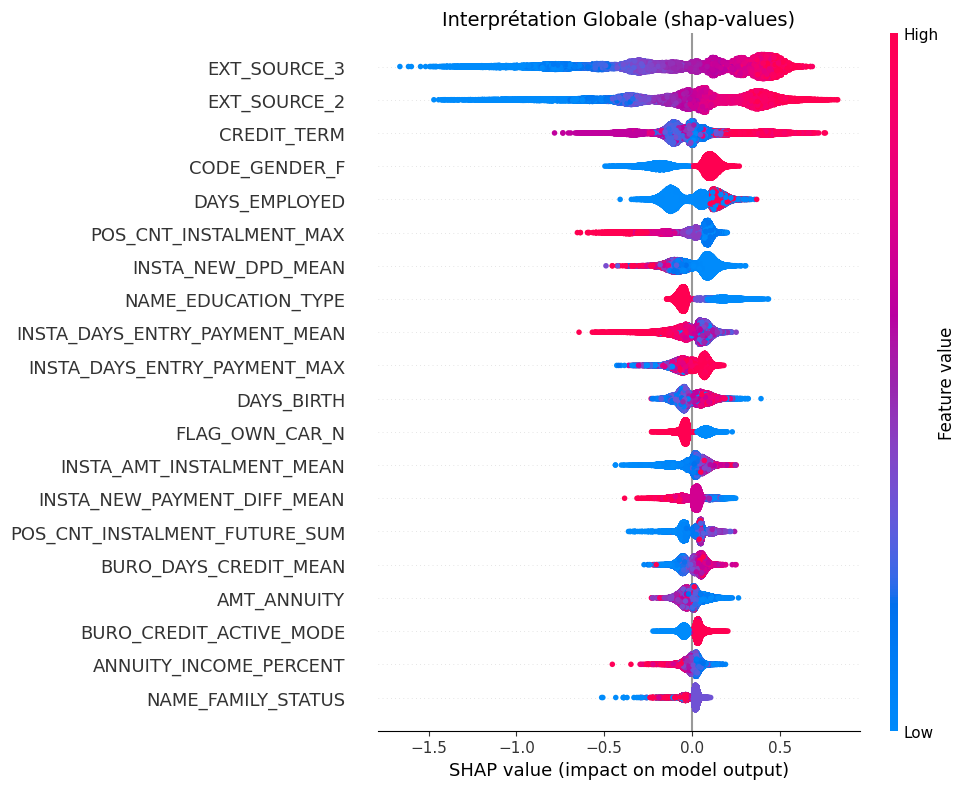

In [27]:
shap.initjs()
shap.summary_plot(shap_values_test[0],
                  features = test,
                  feature_names = test.columns,
                  plot_size = (10,8),
                  show = False

                  )
plt.title("Interprétation Globale (shap-values)",fontsize = 14)
plt.tight_layout()
plt.show()

### Features local:

In [35]:
shap.initjs()  
instance_idx = 0
shap.force_plot(explainer.expected_value[1],shap_values_test[1][instance_idx,:], test.iloc[instance_idx, :])

In [36]:
id_client  = df_test[df_test['SK_ID_CURR']== 456202]
instance_idx =  df_test[df_test['SK_ID_CURR']== 456202].index
shap.initjs()  
shap.force_plot(explainer.expected_value[1], shap_values_test[1][instance_idx,:],
                 id_client.drop(columns=["SK_ID_CURR"],axis = 1))

#### Comparaison avec d'autres clients:

In [37]:
group_client = df_test.merge(proba_df, how='left',on = 'SK_ID_CURR')
group_client.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,INSTA_NEW_DPD_MEAN,INSTA_NEW_PAYMENT_DIFF_MAX,INSTA_NEW_PAYMENT_DIFF_MEAN,INSTA_AMT_INSTALMENT_MEAN,INSTA_NUM_INSTALMENT_NUMBER_MAX,INSTA_DAYS_ENTRY_PAYMENT_MAX,INSTA_DAYS_ENTRY_PAYMENT_MEAN,Class_0,Class_1,y_pred
0,100001,135000.0,568800.0,20560.5,2,4,1,1,1,53.0,...,1.571429,0.00,0.000000,5885.132143,4.0,-1628.0,-2195.000000,0.952690,0.047310,0
1,100005,99000.0,222768.0,17370.0,2,4,4,1,1,49.0,...,0.111111,0.00,0.000000,6240.205000,9.0,-470.0,-609.555556,0.769218,0.230782,0
2,100013,202500.0,663264.0,69777.0,2,4,1,1,1,55.0,...,0.541935,23147.82,1157.662742,10897.898516,113.0,-14.0,-1358.109677,0.983721,0.016279,0
3,100028,315000.0,1575000.0,49018.5,2,4,4,1,1,38.0,...,0.265487,8505.00,622.550708,4979.282257,74.0,-29.0,-858.548673,0.934091,0.065909,0
4,100042,270000.0,959688.0,34600.5,2,3,4,1,1,51.0,...,0.192308,32670.90,263.374615,22120.177995,120.0,-17.0,-1546.208791,0.963135,0.036865,0


In [38]:
group_client['y_pred'] = group_client['y_pred'].map({0: 'Accordé', 1: 'Refusé'})
# group_client.head()
client_po = group_client[group_client['y_pred']== 'Accordé']
client_p1 = group_client[group_client['y_pred']== 'Refusé']


In [39]:
client =group_client[group_client['SK_ID_CURR'] == 100001]

In [40]:
client

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,INSTA_NEW_DPD_MEAN,INSTA_NEW_PAYMENT_DIFF_MAX,INSTA_NEW_PAYMENT_DIFF_MEAN,INSTA_AMT_INSTALMENT_MEAN,INSTA_NUM_INSTALMENT_NUMBER_MAX,INSTA_DAYS_ENTRY_PAYMENT_MAX,INSTA_DAYS_ENTRY_PAYMENT_MEAN,Class_0,Class_1,y_pred
0,100001,135000.0,568800.0,20560.5,2,4,1,1,1,53.0,...,1.571429,0.0,0.0,5885.132143,4.0,-1628.0,-2195.0,0.95269,0.04731,Accordé


In [41]:
group_client.to_csv("./Data/proba_final/data.csv",index  =False)

In [42]:
client = group_client[group_client['SK_ID_CURR'] == 456202]